In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Data/wine_data.csv', header=None,usecols=[0,1,2])

In [4]:
df.head()

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [5]:
df.columns = ["Class_label", 'Alcohol', 'Malic_acid' ]

In [6]:
df.head()

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

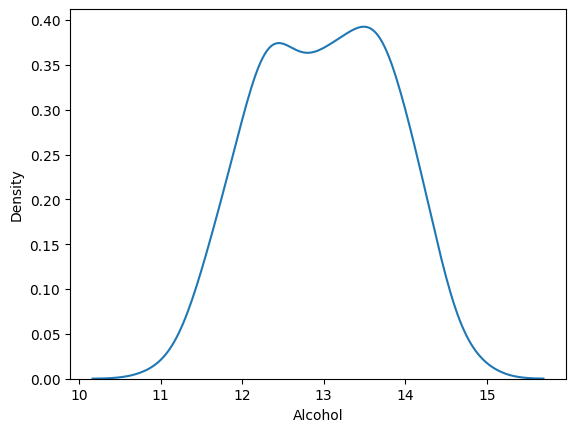

In [7]:
sns.kdeplot(df["Alcohol"])

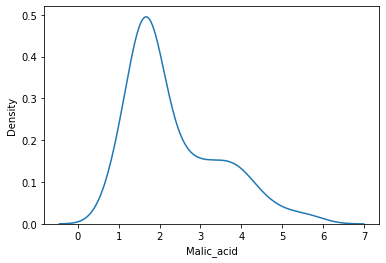

In [ ]:
sns.kdeplot(df["Malic_acid"])

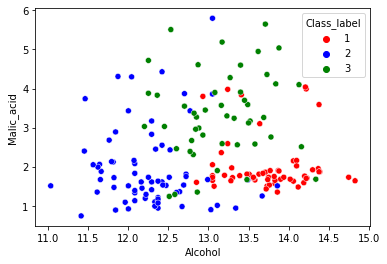

In [ ]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(df['Alcohol'], df['Malic_acid'], hue=df['Class_label'], palette=color_dict)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class_label', axis=1),
                                                    df['Class_label'],
                                                    test_size=0.3,
                                                    random_state=0)

In [ ]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [ ]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


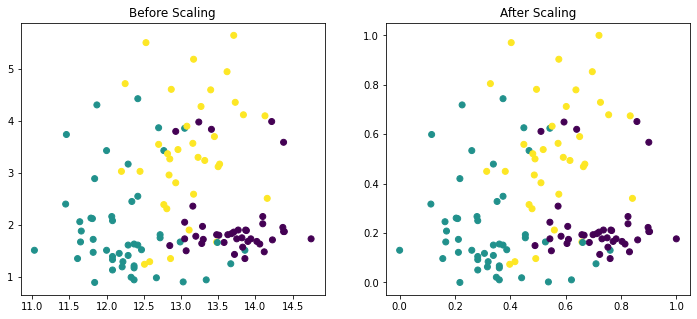

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic_acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic_acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

- There is no difference in both of these scatter plot.
- There is no change in distribution
- Only all data points fitted in range of 0 to 1 after min  max scaling.

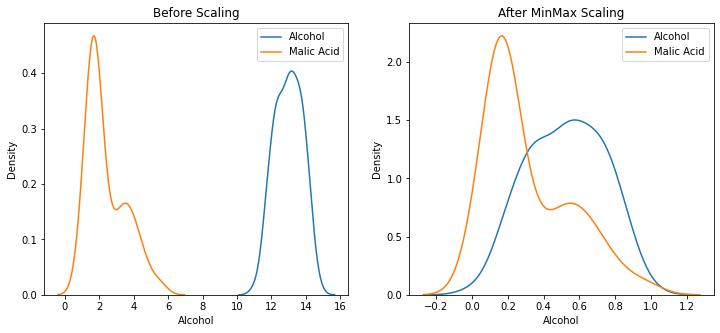

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1, legend=True, Label='Alcohol')
sns.kdeplot(X_train['Malic_acid'], ax=ax1, legend=True, Label='Malic Acid')
ax1.legend()

# after scaling
ax2.set_title('After MinMax Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2, legend=True, Label='Alcohol')
sns.kdeplot(X_train_scaled['Malic_acid'], ax=ax2, legend=True, Label='Malic Acid')
ax2.legend()
plt.show()

- After min max scaling you can see that both Alcohol and Malic Acid comes to same range that is 0 to 1. Now it is more easy to work with these two variables.

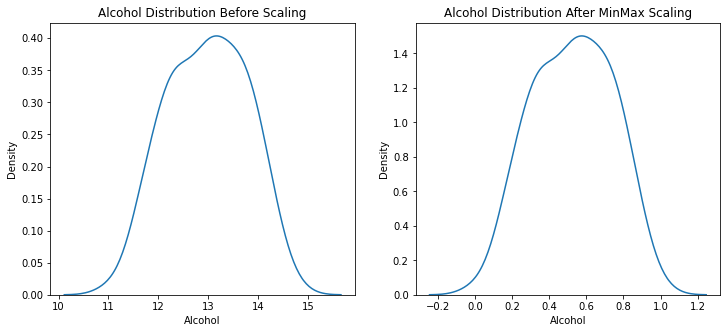

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After MinMax Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

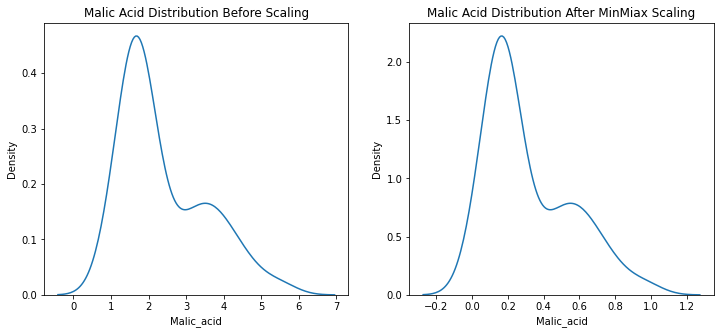

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic Acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic_acid'], ax=ax1)

# after scaling
ax2.set_title('Malic Acid Distribution After MinMiax Scaling')
sns.kdeplot(X_train_scaled['Malic_acid'], ax=ax2)
plt.show()

- There is no change in shape of distribution but scale.
- But it is not mandatory that shape of distribution will always remain same, it may change some time.

- In case of outliers there is one problem that is when we do MinMax scaling all data points fit in range of 0 to 1. So outliers also fit in range of 0 to 1.